In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree


In [305]:
headers=['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
data= pd.read_csv('./data/wdbc.data',names=headers)
data.head()




,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [354]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

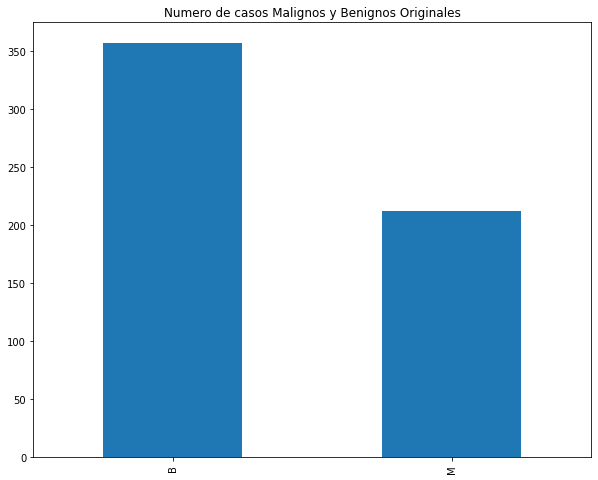

In [306]:
plt.figure(figsize = (10, 8))
data.diagnosis.value_counts().plot(kind='bar')
plt.title("Numero de casos Malignos y Benignos Originales")
plt.show()

In [307]:
#Funcion que toma como entradas los datos de entrenamiento y de test para hacer el FIT y graficar respectivamente la matriz de confusion
def run_experiment(X_train, y_train, X_test, y_test, clf):
    clf.fit(X_train, y_train)
    
    # training confusion matrix
    y_pred = clf.predict(X_train)
    cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    print("Accuracy Train: ", accuracy_score(y_train, y_pred))
    
    # test confusion matrix
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    print("Accuracy Test: ", accuracy_score(y_test, y_pred))
    return disp

In [308]:
X = data[data.columns.drop("diagnosis")]
y = data["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)


In [309]:
linear_clf = SGDClassifier(max_iter=1000, tol=1e-3)
knn_clf = KNeighborsClassifier ()
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()


Accuracy Train:  0.3844221105527638
Accuracy Test:  0.34502923976608185


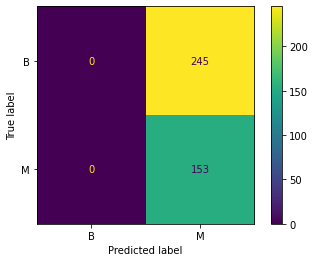

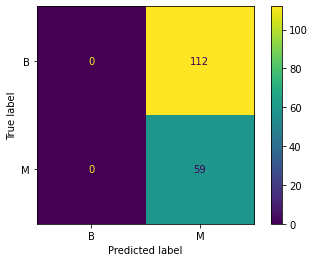

In [310]:
run_experiment(X_train, y_train, X_test, y_test, linear_clf)

Con el modelo lineal se obtienen muy malos resultados, que ningun diganostico benigno es acertado

Accuracy Train:  0.821608040201005
Accuracy Test:  0.7251461988304093


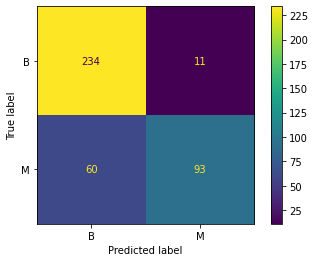

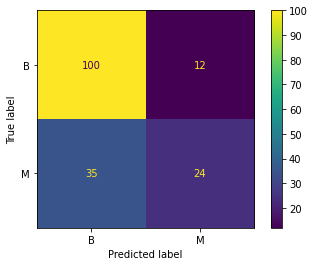

In [311]:

run_experiment(X_train, y_train, X_test, y_test, knn_clf)

Con el modelo de KN se obtienen mejores resultados, sin embargo un resultado de 72% no es aceptable para esta aplicación

Accuracy Train:  1.0
Accuracy Test:  0.9181286549707602


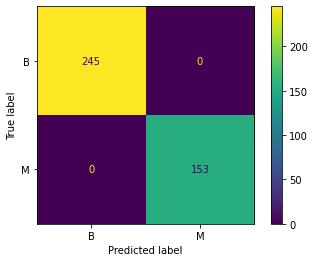

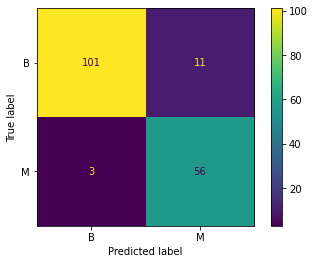

In [312]:

run_experiment(X_train, y_train, X_test, y_test, DecisionTreeClassifier())

Con el modelo de arbol ya se obtienen mejores resultados, sin embargo podemos probar con el random forest para su comparación

Accuracy Train:  1.0
Accuracy Test:  0.9824561403508771


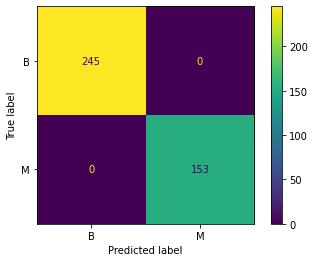

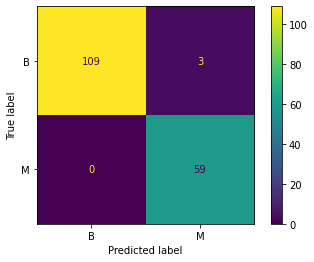

In [313]:
run_experiment(X_train, y_train, X_test, y_test, rf_clf)


Podemos concluir que con el modelo de random forest es el que mejor porcentaje de aciertos nos da. 
Los pasos siguientes los vamos a realizar para ver si podemos conseguir mejorar un poco más los aciertos aunque se puede observar que ya son muy buenos.

In [321]:
rf_clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=11, n_estimators=30)

In [322]:
[estimator.get_depth() for estimator in rf_clf.estimators_]

[7,
 9,
 10,
 10,
 8,
 8,
 9,
 11,
 9,
 8,
 6,
 9,
 7,
 7,
 8,
 6,
 11,
 7,
 7,
 7,
 9,
 8,
 9,
 7,
 7,
 7,
 11,
 7,
 7,
 7]

El modelo de random Forest utilizó 30 arboles de los cuales tienen profundidades de 6 a 11 nodos

<AxesSubplot:>

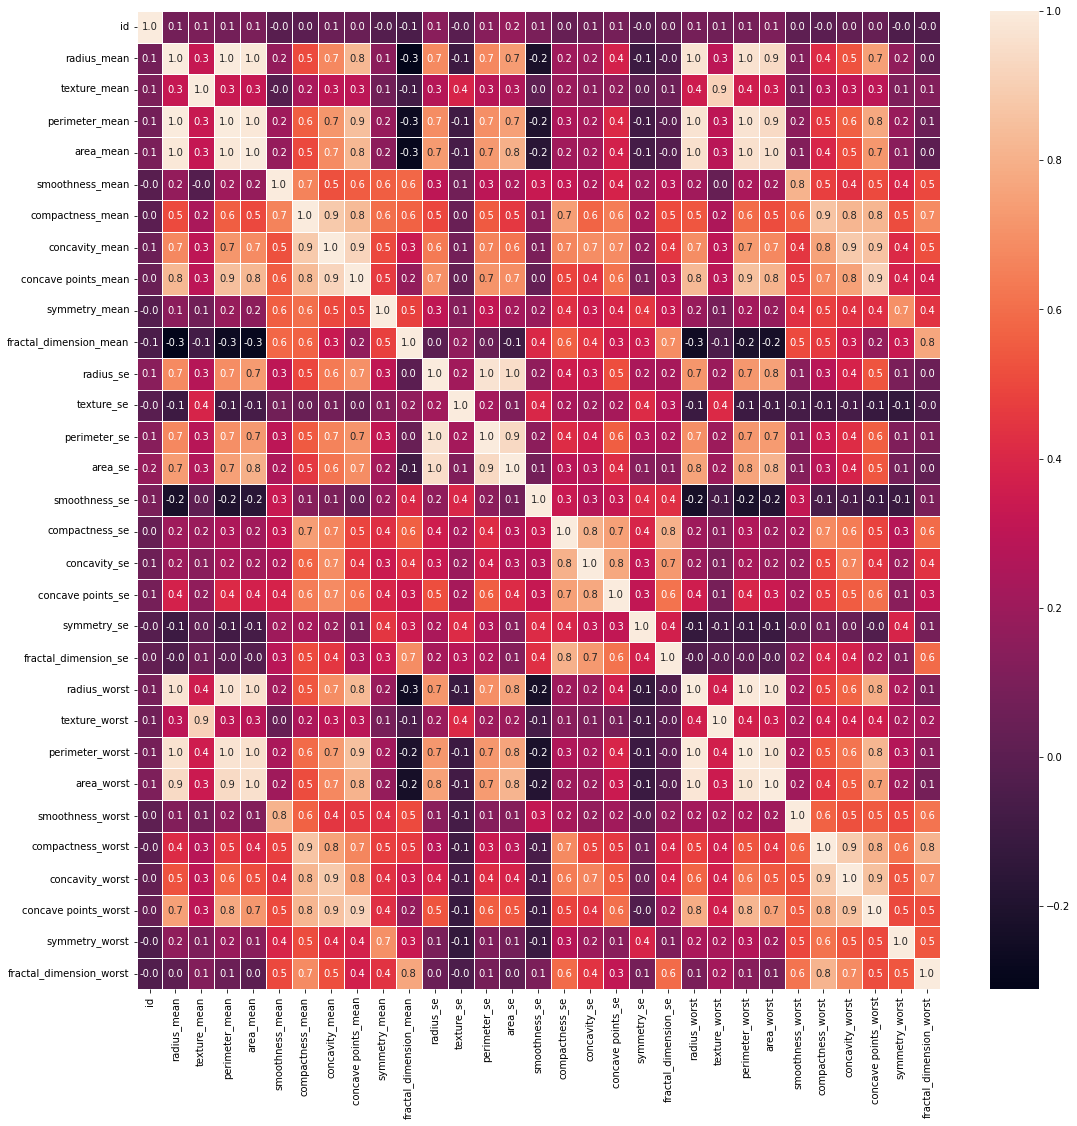

In [316]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Las columnas Compactness_mean, concavity_mean, concave points_mean tienen una relación de 0.9 entre ellas. Por lo tanto se puede escoger solo 1: Compactenss_mean
De igual manera las columnas radius_se, perimeter_se, area_se tienen una relación de 1. Se puede escoger solo 1: radius_se 
Columnas: radius_worst, perimeter_worst, area_worst tienen una relación 1: radius_worst 
Columnas: Compactness_worst, concavity_worst, concave points_worst tienen una relación de 0.9: Compractenss_worst
Columnas:texture_mean and texture_worst tienen una relación de 0.9: texture_mean
Columnas: area_worst, area_mean tienen una relacion de 1: area_worst

In [317]:
columnas_relacionadas=['concavity_mean','concave points_mean','perimeter_se','area_se','perimeter_worst','area_worst','concavity_worst','concave points_worst',
'texture_worst','area_mean','diagnosis']
X_min=data.drop(columnas_relacionadas,axis=1)
y_min=data['diagnosis']


In [318]:
X_min.head()


,id,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,0.1622,0.6656,0.4601,0.11890
1,842517,20.57,17.77,132.90,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,0.1238,0.1866,0.2750,0.08902
2,84300903,19.69,21.25,130.00,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,0.1444,0.4245,0.3613,0.08758
3,84348301,11.42,20.38,77.58,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,0.2098,0.8663,0.6638,0.17300
4,84358402,20.29,14.34,135.10,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,0.1374,0.2050,0.2364,0.07678


In [319]:
X_train, X_test, y_train, y_test = train_test_split(X_min, y_min, test_size=0.3, random_state=10)


Accuracy Train:  1.0
Accuracy Test:  0.9766081871345029


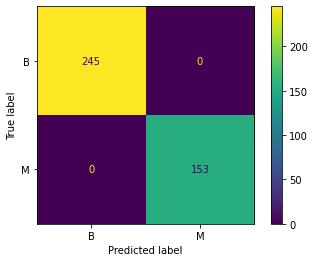

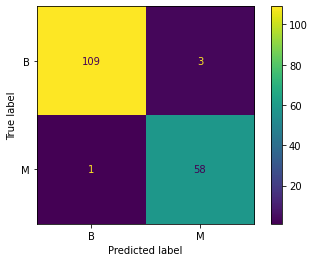

In [353]:
rf_clf = RandomForestClassifier(n_estimators=21, max_depth=11)
#rf_clf.fit(X_train,y_train)
run_experiment(X_train, y_train, X_test, y_test, rf_clf)


Se puede observar que el entrenamiento con las 21 columnas da resultados muy similares a los que ya se obtuvieron anteriormente con 31. Es decir se comprueba la correlación de las columnas eliminadas.

También se hizo un barrido entre los parámetros n_estimators y max_depth para probar si alguna combinación daba un mejor resultado. Sin embargo el óptimo se da con n_estimators=30